# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Obtain Data

Read csv with customer data into pandas

In [2]:
df = pd.read_csv('Data/Mall_Customers.csv')
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Scrub Data

Use df.info() to determine what data scrubbing needed

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Drop CustomerID column not useful for modeling

In [4]:
df.drop(columns='CustomerID', inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Create dummy variables for Gender feature

In [5]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


Confirm dataset is scrubbed with df.info()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Gender_Male             200 non-null    uint8
dtypes: int64(3), uint8(1)
memory usage: 5.0 KB


# Explore Data

Calculate the descriptive statistics for each variable

In [7]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


Plot a histogram for each variable

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

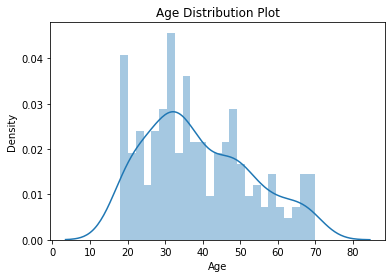

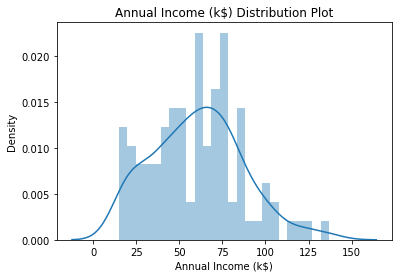

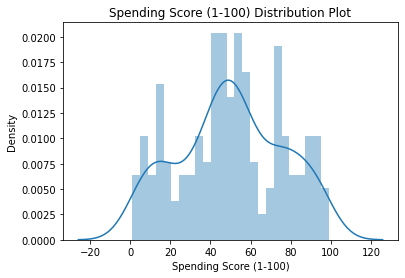

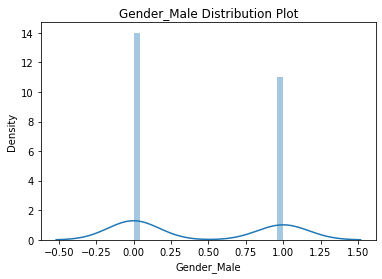

In [8]:
for col in df.columns:
    fig, ax = plt.subplots()
    sns.distplot(df[col], kde=True, bins=25, ax=ax)
    ax.set_title(f'{col} Distribution Plot')

Apply standard scaler to df

In [9]:
ss = StandardScaler()
ss.fit(df)
df = pd.DataFrame(ss.transform(df), columns=df.columns)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


Create a t-sne representation of the customer dataset

In [10]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=2000)
tsne_output = tsne.fit_transform(df)
tsne_df = pd.DataFrame(tsne_output, columns = ['d1', 'd2'])
tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.979316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.965248
[t-SNE] KL divergence after 950 iterations: 0.240433


,d1,d2
0,4.555367,7.690402
1,4.420607,6.132697
2,-3.731421,-2.697511
3,-10.511083,-1.304386
4,-5.067097,-3.261649


Plot the t-sne representation of the customer dataset

Text(0.5, 1.0, 'Customer Clustering t-SNE plot')

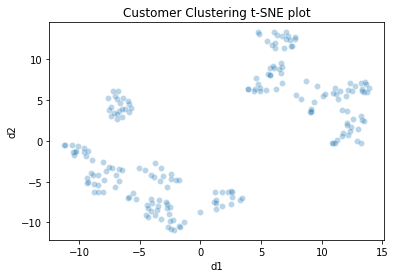

In [11]:
tsne_plot = sns.scatterplot(
    x="d1", y="d2",
    palette=sns.color_palette("hls", 2),
    data=tsne_df,
    legend="full",
    alpha=0.3)
tsne_plot.set_title('Customer Clustering t-SNE plot')

# Model Data

Create kmeans clustering elbow plot of sum of squared distances

Text(0, 0.5, 'Sum of Squared Distances')

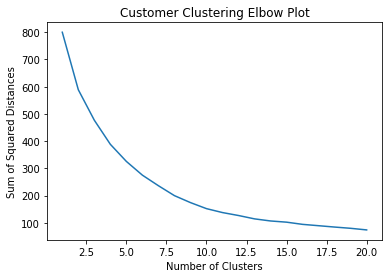

In [12]:
elbow_values = []
for k in range(1,21):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    elbow_values.append([k, kmeans.inertia_])
elbow_df = pd.DataFrame(elbow_values, columns = ['K','Inertia'])
fig, ax = plt.subplots()
ax.plot(elbow_df['K'], elbow_df['Inertia'])
ax.set_title('Customer Clustering Elbow Plot')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Sum of Squared Distances')

Create plot of silhouette score by number of clusters

Text(0, 0.5, 'Silhouette Score')

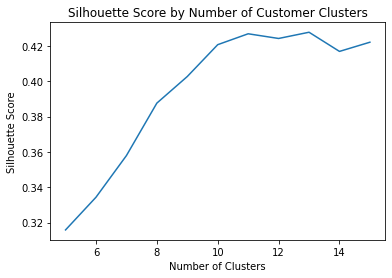

In [13]:
silhouette_scores = []
for k in range(5,16):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    labels = kmeans.labels_
    sil_score = silhouette_score(df, labels)
    silhouette_scores.append([k, sil_score])
sil_df = pd.DataFrame(silhouette_scores, columns = ['K','Silhouette Score'])
fig, ax = plt.subplots()
ax.plot(sil_df['K'], sil_df['Silhouette Score'])
ax.set_title('Silhouette Score by Number of Customer Clusters')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Silhouette Score')

Create hierarchical agglomerative clustering dendrogram

Text(0, 0.5, 'Distance')

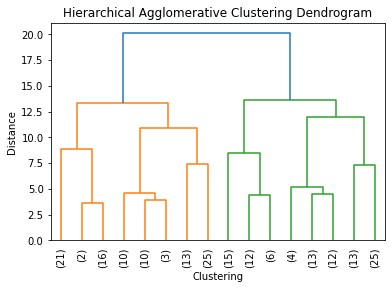

In [14]:
link = linkage(df, 'ward')
dendrogram(link, truncate_mode='lastp', p=16, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Agglomerative Clustering Dendrogram')
plt.xlabel('Clustering')
plt.ylabel('Distance')

# Interpret Results

Create labels for each datapoint

In [15]:
tsne_kmeans = KMeans(n_clusters = 10)
tsne_kmeans.fit(df)
y = tsne_kmeans.labels_

Create a t-sne representation of the customer dataset

In [16]:
clustered_tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=2000)
clustered_tsne_output = clustered_tsne.fit_transform(df)
clustered_tsne_df = pd.DataFrame(clustered_tsne_output, columns = ['d1', 'd2'])
clustered_tsne_df.head()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.001s...
[t-SNE] Computed neighbors for 200 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 0.979316
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.255066
[t-SNE] KL divergence after 800 iterations: 0.244596


,d1,d2
0,-4.927768,-4.531627
1,-6.046926,-3.902192
2,9.813957,12.431389
3,-0.397708,4.475659
4,4.253000,5.064325


Plot tsne representation of dataset clusters

Text(0.5, 1.0, 'Poisonous Mushroom Classification t-SNE plot')

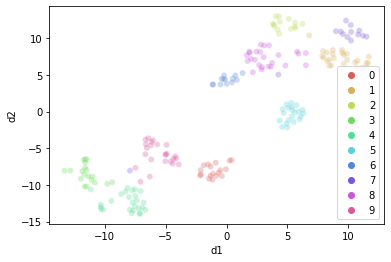

In [17]:
clustered_tsne_plot = sns.scatterplot(
    x="d1", y="d2",
    hue=y,
    palette=sns.color_palette("hls", 10),
    data=clustered_tsne_df,
    legend="full",
    alpha=0.3)
tsne_plot.set_title('Poisonous Mushroom Classification t-SNE plot')